In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
ref_measurement = Base.classes.measurement
ref_station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
first_row = session.query(ref_measurement).first() ## .one()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x249a4d2dee0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'id': 1,
 'date': '2010-01-01'}

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# solution found through Stack Overflow - https://stackoverflow.com/questions/49607031/last-record-in-column-sqlalchemy
lastdate = session.query(ref_measurement.date).order_by(ref_measurement.id.desc()).first()
lastdate

('2017-08-23',)

In [11]:
lastdate = session.query(ref_measurement.date).order_by(ref_measurement.id.desc()).limit(348)
print(*lastdate)

('2017-08-23',) ('2017-08-22',) ('2017-08-21',) ('2017-08-20',) ('2017-08-19',) ('2017-08-18',) ('2017-08-17',) ('2017-08-16',) ('2017-08-15',) ('2017-08-14',) ('2017-08-13',) ('2017-08-12',) ('2017-08-11',) ('2017-08-10',) ('2017-08-09',) ('2017-08-08',) ('2017-08-07',) ('2017-08-06',) ('2017-08-05',) ('2017-08-03',) ('2017-08-02',) ('2017-08-01',) ('2017-07-31',) ('2017-07-30',) ('2017-07-29',) ('2017-07-28',) ('2017-07-27',) ('2017-07-26',) ('2017-07-25',) ('2017-07-24',) ('2017-07-23',) ('2017-07-22',) ('2017-07-21',) ('2017-07-20',) ('2017-07-19',) ('2017-07-18',) ('2017-07-17',) ('2017-07-16',) ('2017-07-15',) ('2017-07-14',) ('2017-07-13',) ('2017-07-12',) ('2017-07-11',) ('2017-07-10',) ('2017-07-09',) ('2017-07-08',) ('2017-07-07',) ('2017-07-06',) ('2017-07-05',) ('2017-07-04',) ('2017-07-03',) ('2017-07-02',) ('2017-07-01',) ('2017-06-30',) ('2017-06-29',) ('2017-06-28',) ('2017-06-27',) ('2017-06-26',) ('2017-06-25',) ('2017-06-24',) ('2017-06-23',) ('2017-06-22',) ('2017-0

<AxesSubplot:title={'center':'Last 12 months of precipitation'}, xlabel='date', ylabel='precipitation (inches)'>

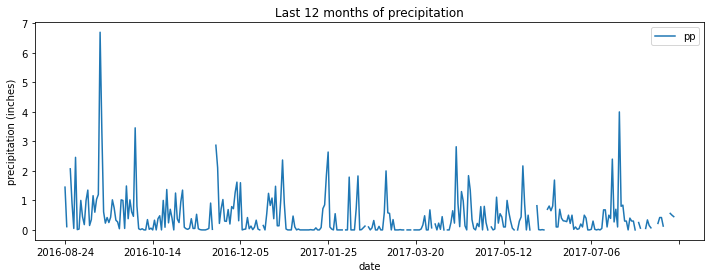

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

pp = session.query(ref_measurement.date, ref_measurement.prcp).order_by(ref_measurement.id.desc()).limit(348)                           

pp_df = pd.DataFrame(pp,columns=['date','pp'])

# Sort the dataframe by date
pp_df = pp_df.sort_values("date")


pp_df.plot(x='date',y='pp',  title = 'Last 12 months of precipitation', \
           xlabel = 'date', ylabel = 'precipitation (inches)' , figsize=(12,4))




2016-08-23


<AxesSubplot:title={'center':'Last 12 months of precipitation'}, xlabel='date', ylabel='precipitation (inches)'>

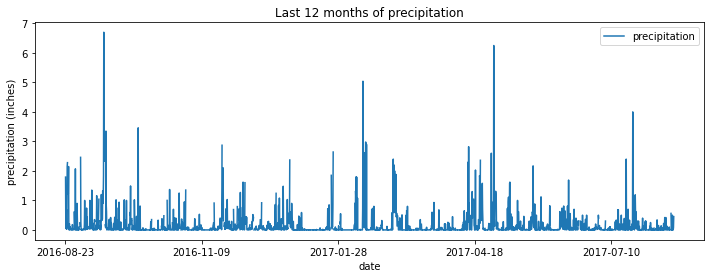

In [43]:
# Calculate the date one year from the last date in data set.
# code snip from TA Yash Shah
lastyear = dt.date(2017,8,23) - dt.timedelta(days=365)
print (lastyear)

# Perform a query to retrieve the data and precipitation scores
precp = session.query(ref_measurement.date, ref_measurement.prcp).filter(ref_measurement.date>=lastyear).all()    

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precp_df = pd.DataFrame(precp,columns=['date','precipitation'])

# Sort the dataframe by date
precp_df = precp_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
precp_df.plot(x='date',y='precipitation', title = 'Last 12 months of precipitation', \
           xlabel = 'date', ylabel = 'precipitation (inches)' , figsize=(12,4))

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
precp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(ref_station.station)).all()

[(9,)]

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(ref_measurement.station, func.count(ref_measurement.station)).\
    group_by(ref_measurement.station).order_by(func.count(ref_measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(ref_measurement.tobs), func.max(ref_measurement.tobs), func.avg(ref_measurement.tobs)).\
    filter(ref_measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

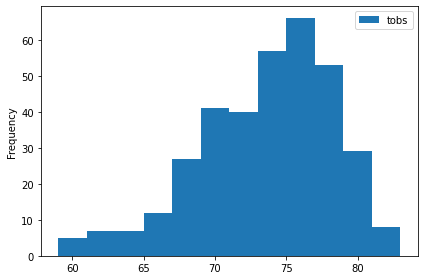

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#import datetime as dt
from pandas.plotting import table
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(ref_measurement.tobs).\
    filter(ref_measurement.station == 'USC00519281').\
    filter(ref_measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

# Close Session

In [19]:
# Close Session
session.close()